In [ ]:
import tensorflow
import sklearn
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np

import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

plt.style.use('ggplot')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam



Downloading Data

In [2]:
tweet= pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv')

In [ ]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
 tweet.shape

(7613, 5)

In [4]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Exploratory Data Analysis

###Target Class Distribution

In [5]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 120

In [6]:
tweet

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Real or Not Real Tweet Disaster')

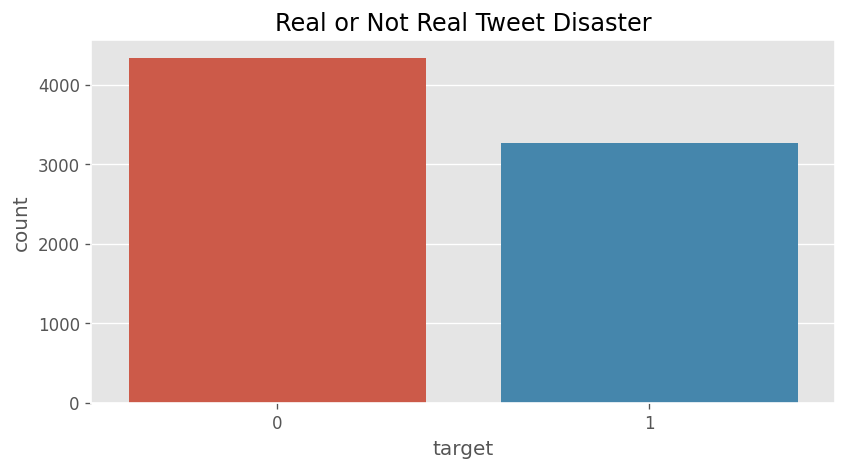

In [7]:
sns.countplot('target', data=tweet)
plt.title('Real or Not Real Tweet Disaster')

In [8]:
tweet ['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

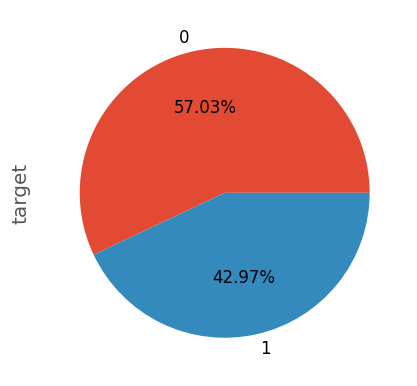

In [9]:
tweet['target'].value_counts().plot.pie(autopct='%1.2f%%')

###Number of Characters Distribution in Tweets 

In [11]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-1ygn5k_8
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-1ygn5k_8
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7639 sha256=dbb9b6e0e440e2baeafaeac4e7653225496b6ca098932be58d4136c08824d02a
  Stored in directory: /tmp/pip-ephem-wheel-cache-eivm0fip/wheels/d1/c3/bb/559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie


In [12]:
import preprocess_kgptalkie as kgp

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [16]:
tweet = kgp.get_basic_features(tweet)

In [13]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='char_counts', ylabel='Density'>

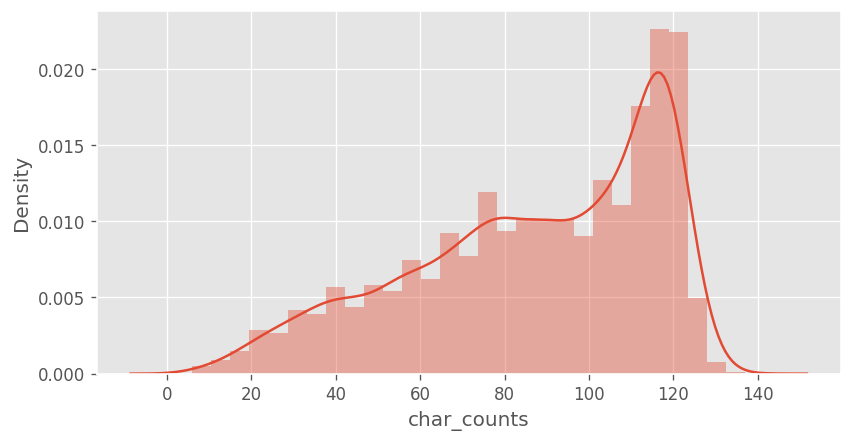

In [17]:
sns.distplot(tweet['char_counts'])

<AxesSubplot:xlabel='char_counts', ylabel='Density'>

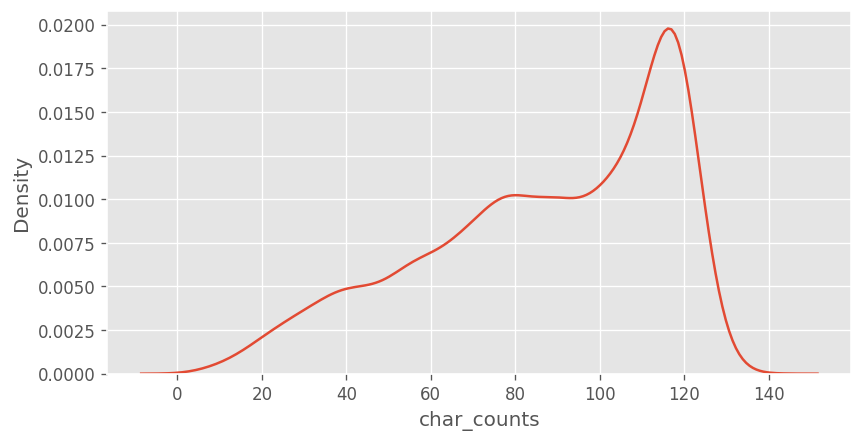

In [18]:
sns.kdeplot(tweet['char_counts'])

<AxesSubplot:xlabel='char_counts', ylabel='Density'>

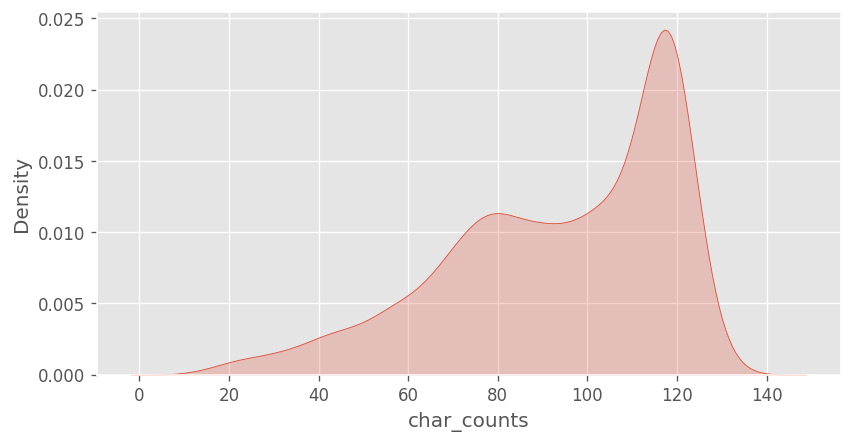

In [20]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], shade=True )

<AxesSubplot:xlabel='char_counts', ylabel='Density'>

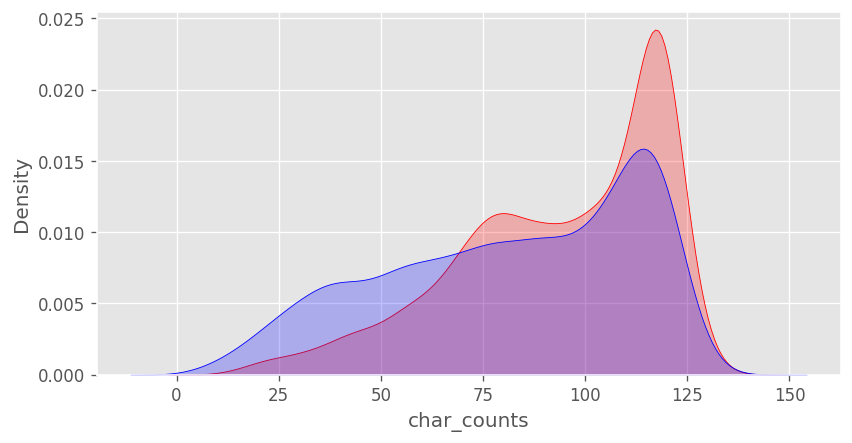

In [25]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], shade=True , color='red')
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], shade=True ,color = 'blue')

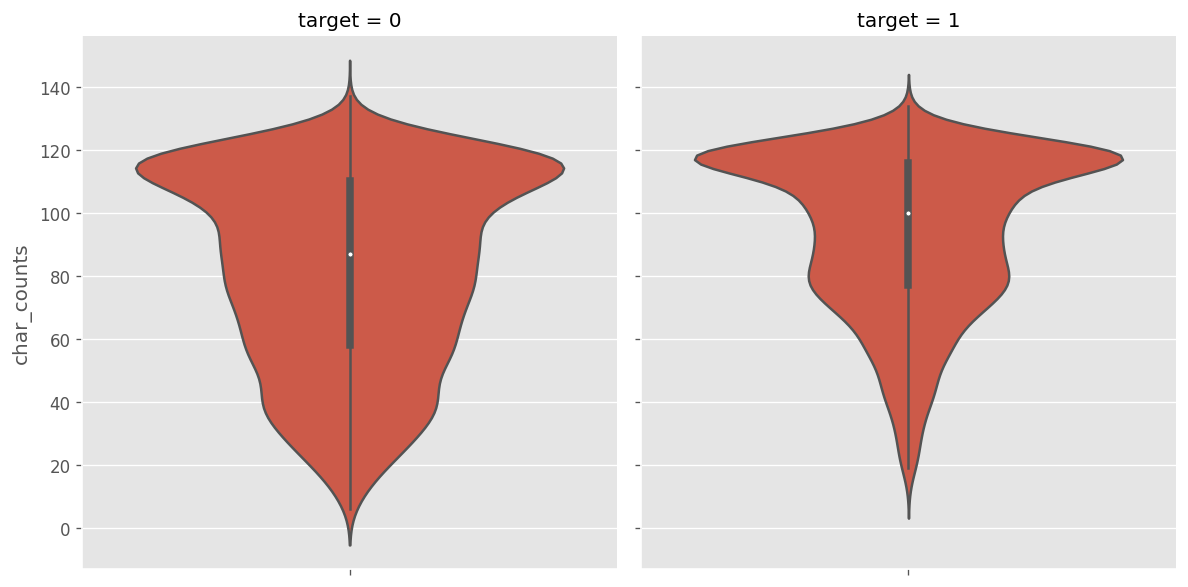

In [24]:
sns.catplot(y='char_counts', data=tweet,kind='violin', col='target')

###Number of words, Average words Length and Stop words Distribution in Tweets

<AxesSubplot:xlabel='word_counts', ylabel='Density'>

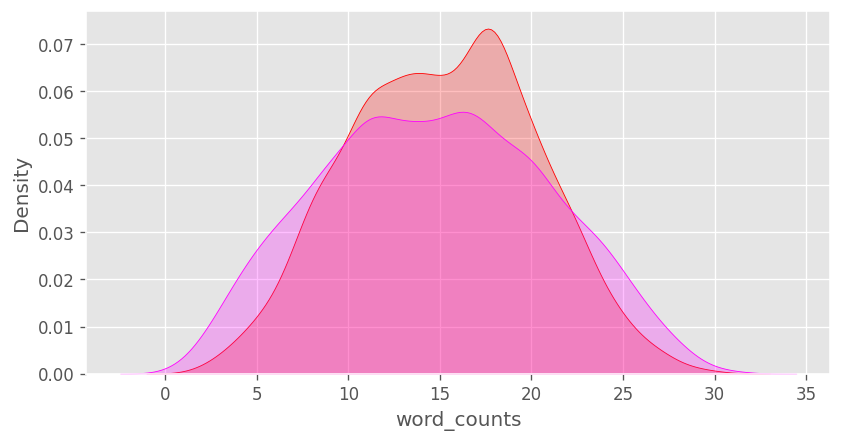

In [28]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], shade=True , color='red')
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], shade=True ,color = 'magenta')

<AxesSubplot:xlabel='avg_wordlength', ylabel='Density'>

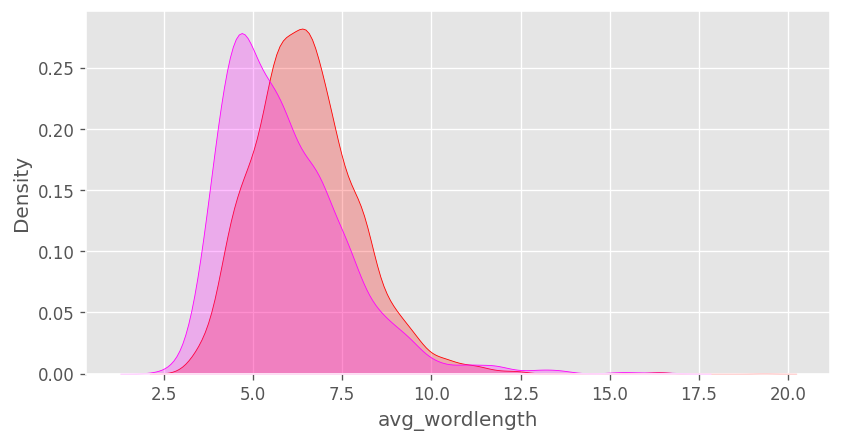

In [29]:
sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], shade=True , color='red')
sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], shade=True ,color = 'magenta')

<AxesSubplot:xlabel='stopwords_counts', ylabel='Density'>

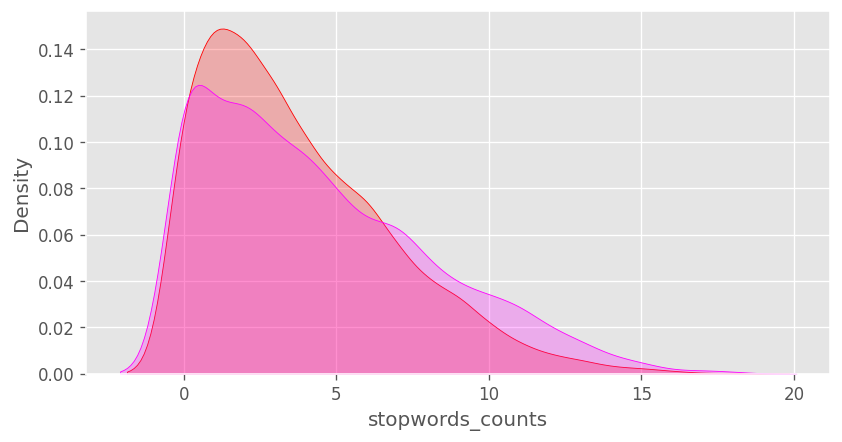

In [31]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], shade=True , color='red')
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], shade=True ,color = 'magenta')

###Most and Least Common Words

In [33]:
freqs= kgp.get_word_freqs(tweet,'text')

In [34]:
top20= freqs[:20]

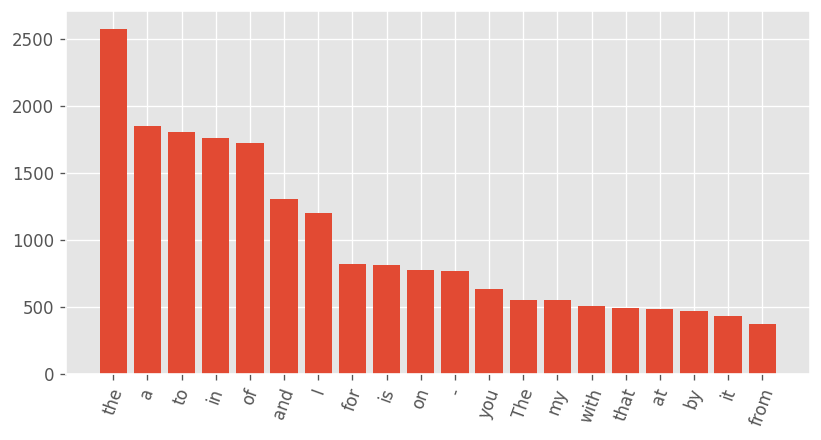

In [36]:
plt.bar(top20.index,top20.values)
plt.xticks(rotation=70)
plt.show()

In [37]:
least20 = freqs[-20:]
least20

http://t.co/JD7rIK7fX0     1
ft.åÊM.O.P.                1
http://t.co/ZDTz3RbS6w     1
'Detonate.'                1
@ApolloBrown's             1
PLAY                       1
missed.                    1
detonate&amp;Shots         1
succeed                    1
marines                    1
@BBCTalkback               1
@rfcgeom66                 1
@tomfromireland            1
@SourMashNumber7           1
#FIYA!                     1
https://t.co/NlJVP3Vfyz    1
(Ft.                       1
Dix                        1
bandolier                  1
http://t.co/YmY4rSkQ3d     1
dtype: int64

bigram

In [38]:
bigram = kgp.get_ngram(tweet, 'text' , ngram_range=2)

In [40]:
bigram[:20]

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491),
 ('ûó wallybaiter', 68490),
 ('ûó the', 68489),
 ('ûó stories', 68488),
 ('ûó rt', 68487),
 ('ûó richmond', 68486),
 ('ûó organizers', 68485),
 ('ûó oh', 68484),
 ('ûó now', 68483),
 ('ûó lol', 68482),
 ('ûó integrates', 68481),
 ('ûó https', 68480),
 ('ûó hiroshima', 68479),
 ('ûó head', 68478),
 ('ûó eh', 68477),
 ('ûó desolation', 68476)]

###One-Shot Data Cleaning

In [43]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ').replace('.', ' ')
    x = kgp.cont_exp(x)     # i'm -> i am 
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = kgp.remove_dups_char(x)  #  loooovvee youu -> love you
    return x

In [45]:
tweet['text'] = tweet['text'].apply(lambda x: get_clean(x))
# no special characters. All punctuations and other things are removed

In [47]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [ ]:
# kgp.get_ngram(tweet, 'text' , ngram_range=2)

###Disaster Words Visualization with Word Clouds

In [52]:
# extarcting tweets that are really talking about the disaster which has happened
real = kgp.get_word_freqs(tweet[tweet['target']==1],'text')
real = ' '.join(real.index)
real

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via disaster an were be people california suicide has no police who but when been killed like do 2 will just hiroshima than so out fires storm crash families we train now about into emergency s your buildings bomb there all what two mh370 attack am nuclear they wildfire video accident get new one bombing how prime minister northern burning legionnaires dead me bomber homes some if car war still atomic obama he fatal years off may us collapse forest retweet city watch debris malaysia first today 1 japan or man latest mass severe near water had earthquake before those confirmed found oil would down 70 spill floods army world home under warning 4 could injured wreckage weather derailment outbreak 3 evacuation being saudi thunderstorm migrants 40 our old flood missing flooding can during say investigators their time bridge back mosque death suspect state her cha

<function matplotlib.pyplot.show(close=None, block=None)>

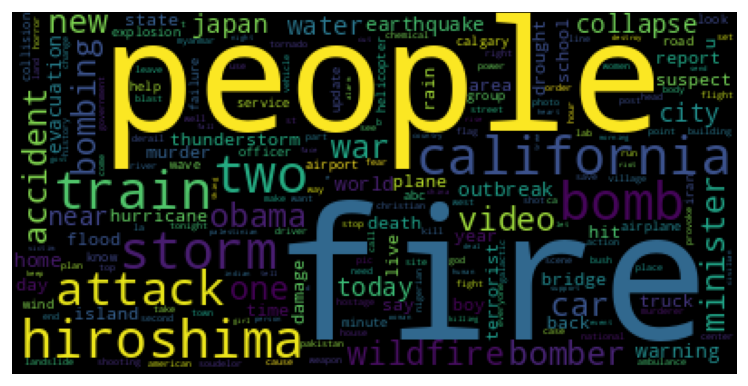

In [54]:
word_cloud= WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show

In [55]:
# extarcting tweets that are really talking about the disaster which has not happened
# not real plot
nreal = kgp.get_word_freqs(tweet[tweet['target']==0],'text')
nreal = ' '.join(nreal.index)
nreal

'the httpt i a to and of is in you my it for not on that with this have be am httpst are do me out your like so by at just was but will up all he if from new as get they has or we no when now about what would an how one can there body people 2 via been her his into video more loud us know love back time why got off emergency them full see after who day 3 going cannot youtube did still some fire let good go she think laughing want had man our should ass retweet world over then way life their first youre work too last burning only make really need than news god because best much even being here many content take help could right 5 say wreck him were black feel great today its please hot look im fucking never every 4 1 down fear cross bags before read ever oh fuck does top night reddit come without bag these getting another any everyone year shit death panic screaming liked head ruin may bloody wrecked u always smoke bad most explode w school face well buildings harm disaster crash coming

<function matplotlib.pyplot.show(close=None, block=None)>

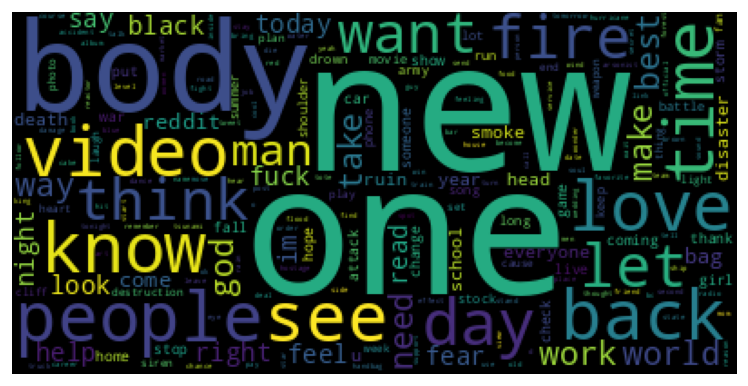

In [58]:
word_cloud= WordCloud(max_font_size=100).generate(nreal)
plt.imshow(word_cloud)
plt.axis('off')
plt.show